# Exact Binomial Interval Calculator

- Run each cell or see [README](https://kazkobara.github.io/ebcic/).

In [ ]:
# Run this cell, if `ebcic` package has not been installed yet:
%pip install ebcic

# For test
# %pip install -i https://test.pypi.org/simple/ ebcic==0.0.2b0

# If you want to install it from a local directory, run below instead of the above:
# %pip install --no-index --find-links=ebcic ebcic

In [3]:
import ebcic
from ebcic import *

'''
import scipy
import matplotlib
from platform import python_version

print(f"scipy     : {scipy.version.full_version}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"python    : {python_version()}")  # os, math, warnings
'''

print(f"np        : {np.__version__}")
print(f"sys       : {sys.version[:6]}")
print(f"logging   : {logging.__version__}")

print(f"ebcic     : {ebcic.__version__}")

np        : 1.20.1
sys       : 3.9.0 
logging   : 0.5.1.2
ebcic     : 0.0.0


In [4]:
"""Print exact interval as text.
Edit the following parameters, k, n, confi_perc, and run this cell.
"""
print_interval(Params(
    k=1,               # Number of errors
    n=501255,          # Number of trials
    confi_perc = 99.0  # Confidence percentage for two-sided [0-100]
    # For one-sided, set
    #  confi_perc = 2 * (confidence percentage for one-sided [50-100]) - 100
))

===== Parameters =====
n (num of trials)  : 501255
k (num of failures): 1
k/n (observed p')  : {1.99499257e-06}

===== Exact interval of p with 99.0 [%] two-sided (or 99.5 [%] one-sided) confidence  =====
Upper : 1.482295806e-05
Lower : 9.99998e-09
Width : 1.481295808e-05

===== Verification =====
If the following does not hold, the results might not be reliable.

Upper : check if abs(alpha/2 (0.005) - cumulative error (0.0049999999998875805)) <= 1e-10
Lower : check if abs(alpha/2 (0.005) - cumulative error (0.004999999993592585)) <= 1e-10
Upper : check if upper bound (1.4822958060917482e-05) >= k/n (1.9949925686526818e-06)
Lower : check if lower bound (9.999983660202857e-09) <= k/n (1.9949925686526818e-06)

OK: obtained interval is reliable.


In [5]:
"""Print exact interval in a 'simple' and 'primitive' text.
Edit the following parameters, k, n, confi_perc, and run this cell.
"""
interval = exact((Params(k=1, n=501255, confi_perc = 99.0)))
print(interval)

(9.999983660202857e-09, 1.4822958060917482e-05)


In [147]:
"""Example of FIDO parameters
Minimal number of trials (n) when the number of errors (k) is k=0 and 1
to satisfy FIDO requirements.
"""
# Confidence percentage for two-sided [0-100]
# For one-sided, set
#   cp = 2 * (confidence percentage for one-sided [50-100]) - 100
cp = 60.0 

'''FIDO FAR Requirement
False Accept Rate SHALL meet the requirement of less than 1:10,000
for the upper bound of a 80% confidence interval.
'''
interval = exact((Params(k=0, n=9163, confi_perc=cp)))
print("For k=0 and n=9163,  FAR=", interval[1])
interval = exact((Params(k=1, n=29943, confi_perc=cp)))
print("For k=1 and n=29943, FAR=", interval[1])

'''FIDO FRR Requirement
False Reject Rate SHALL meet the requirement of less than 3:100
for the upper bound of a 80% confidence interval.
'''
interval = exact((Params(k=0, n=31, confi_perc=cp)))
print("For k=0 and n=31,    FRR=", interval[1])
interval = exact((Params(k=1, n=99, confi_perc=cp)))
print("For k=1 and n=99,    FRR=", interval[1])

For k=0 and n=9163,  FAR= 9.999398879489974e-05
For k=1 and n=29943, FAR= 9.999694863724864e-05
For k=0 and n=31,    FRR= 0.029125207089559013
For k=1 and n=99,    FRR= 0.029942423559696136


In [148]:
"""Comparison between exact interval and approximate intervals
Approximate intervals are not correct (exact) for certain parameters.
"""
kk = 1     # Number of errors
nn = 99    # Number of trials
# Confidence percentage for two-sided [0-100]
# For one-sided, set
#  cp = 2 * (confidence percentage for one-sided [50-100]) - 100
cp = 60.0 
print("Upper bound of confidence interval obtained by")
interval = exact((Params(k=kk, n=nn, confi_perc=cp)))
print(" Exact:                                  ", interval[1])
interval = normal_approx((Params(k=kk, n=nn, confi_perc=cp)))
print(" Normal approximation:                   ", interval[1])
interval = wilson_score_cc((Params(k=kk, n=nn, confi_perc=cp)))
print(" Wilson score with continuity correction:", interval[1])

Upper bound of confidence interval obtained by
 Exact:                                   0.029942423559696136
 Normal approximation:                    0.018645485667639093
 Wilson score with continuity correction: 0.025528419700694492


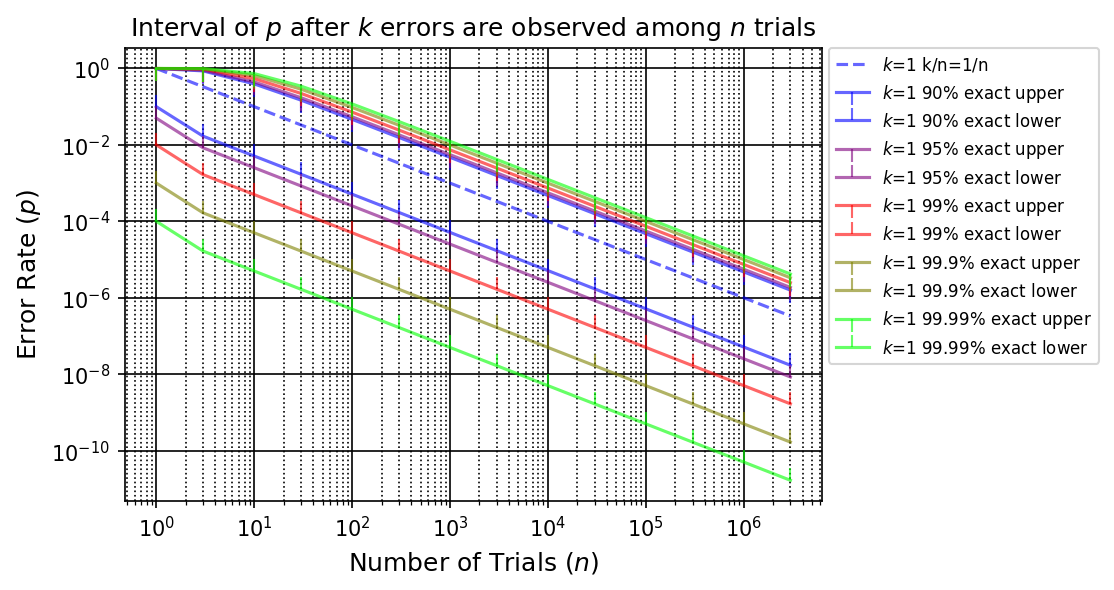

In [5]:
"""Depict graphs of exact intervals and the line of k/n for k=1.
Edit the following parameters and run this cell.
"""
interval_graph(GraProps(
    # Set the range of k with k_*
    k_start=1,  # >= 0
    k_end=1,    # > k_start
    k_step=1,   # > 0
    # Set max of n with with
    log_n_end=6,  # where max(n) = 3*k_end*10**log_n_end
    # Edit the list of confidence percentages [0-100]:
    confi_perc_list=[90, 95, 99, 99.9, 99.99],
    # Comment-out lines to depict
    line_list=[
        'with_exact',
        # The followings are approximation.
        'with_line_kn',  # Line of k/n
        # Available only when k = 0
        # 'with_rule_of_la',
        # Available only when k > 0
        # 'with_normal',
        # 'with_wilson',
        # 'with_wilson_cc',
    ],
    # savefig = True,
    # fig_file_name='intervals.jpg'
    ))

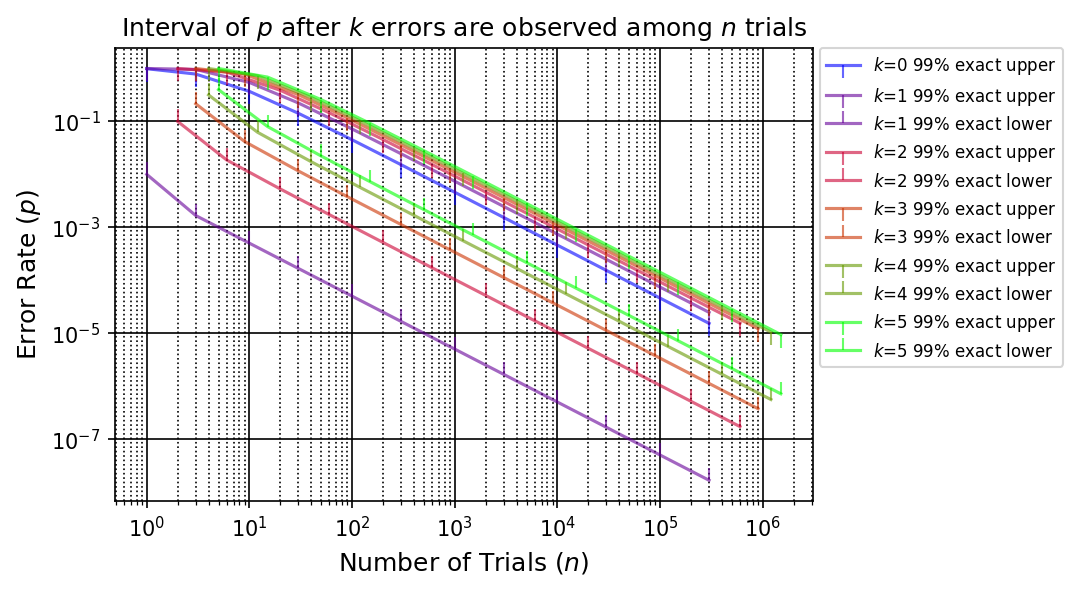

In [15]:
"""Depict graphs of exact intervals for k=0 to 5 in step 1.
Edit the following parameters and run this cell.
"""
interval_graph(GraProps(
    k_start=0,  # >= 0
    k_end=5,    # > k_start
    line_list=['with_exact']))

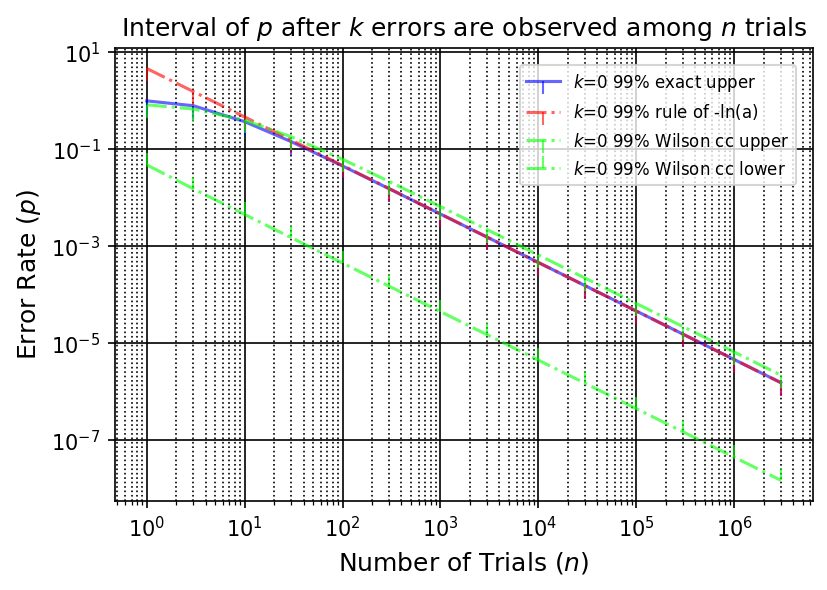

In [6]:
"""Depict graphs for comparison of exact and approximated intervals for k=0.
Edit the following parameters and run this cell.
"""
interval_graph(GraProps(
    k_start=0,  # >= 0
    k_end=0,    # > k_start
    confi_perc_list=[99],
    line_list=[
        'with_exact',
        'with_rule_of_la',
        'with_normal',  # not available for k=0
        'with_wilson',
        'with_wilson_cc',
    ],
))

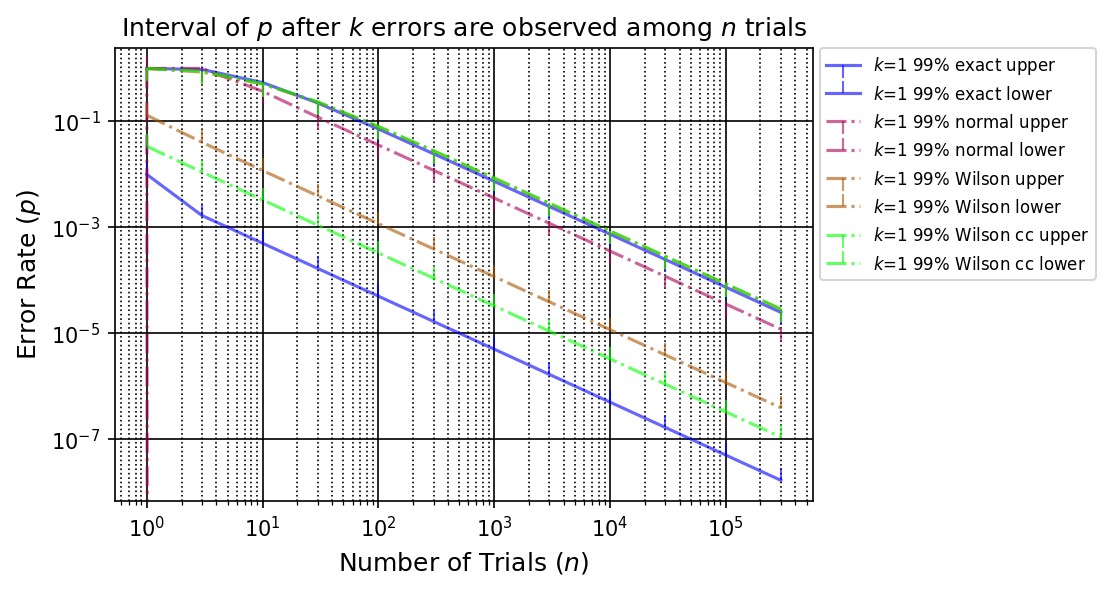

In [8]:
"""Depict graphs for comparison of exact and approximated intervals for k=1.
Edit the following parameters and run this cell.
"""
interval_graph(GraProps(
    k_start=1,  # >= 0
    k_end=1,    # > k_start
    line_list=[
        'with_exact',
        'with_normal',
        'with_wilson',
        'with_wilson_cc',
    ]))

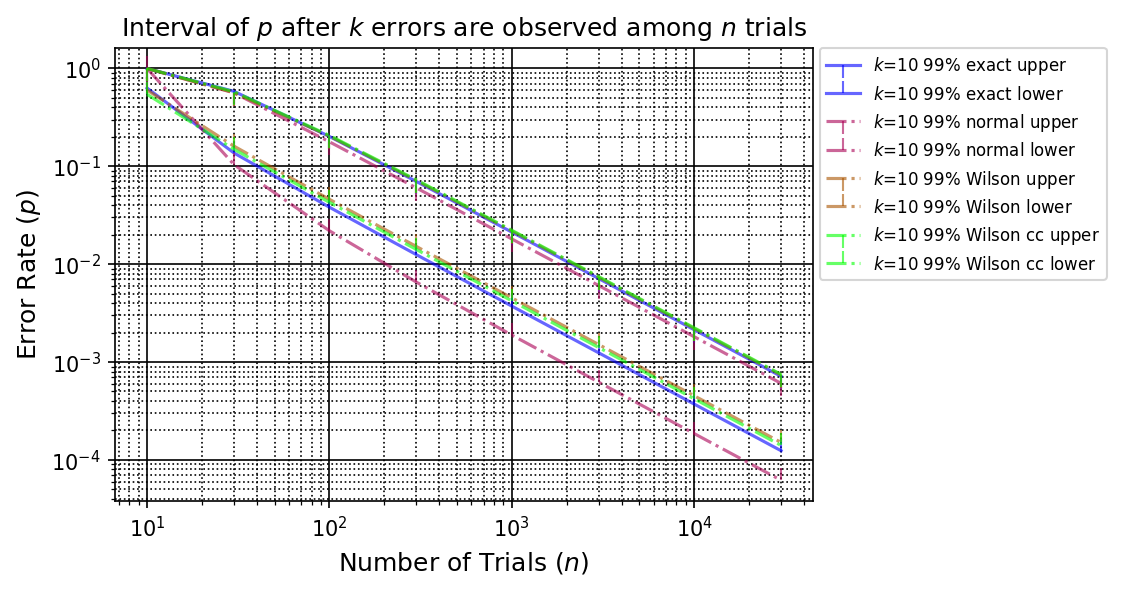

In [12]:
"""Depict graphs for comparison of exact and approximated intervals for k=10.
Edit the following parameters and run this cell.
"""
interval_graph(GraProps(
    k_start=10,   # >= 0
    k_end=10,     # > k_start
    log_n_end=3,  # max(n) = 3*k_end*10**log_n_end
    line_list=[
        'with_exact',
        'with_normal',
        'with_wilson',
        'with_wilson_cc',
    ],
    ))

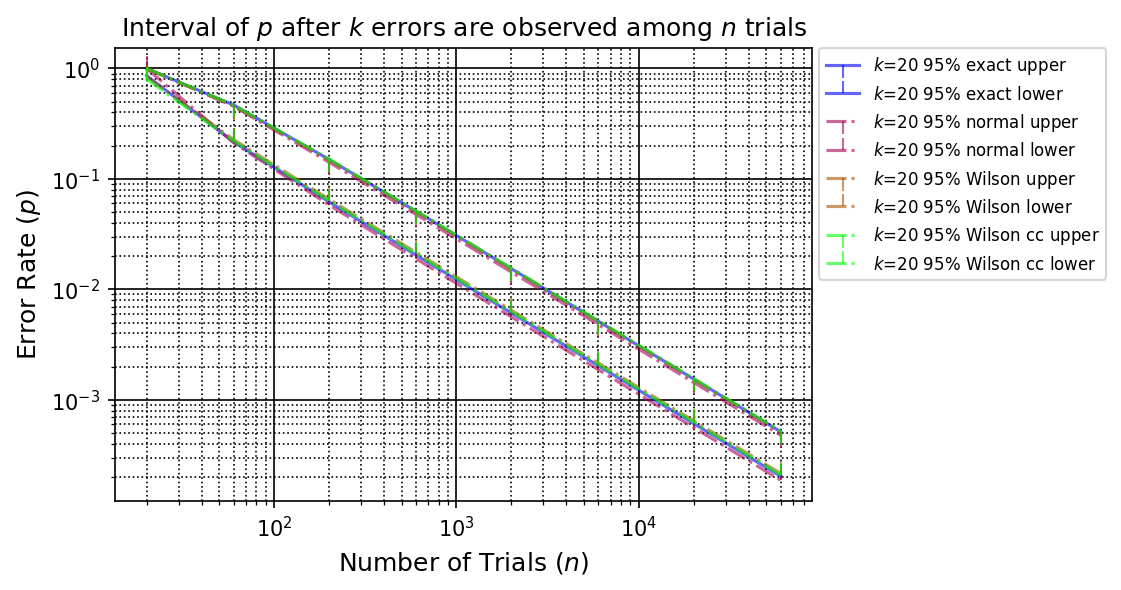

In [45]:
"""Depict graphs for comparison of exact and approximated intervals for k=20.
Edit the following parameters and run this cell.
"""
interval_graph(GraProps(
    k_start=20,   # >= 0
    k_end=20,     # > k_start
    log_n_end=3,  # max(n) = 3*k_end*10**log_n_end
    line_list=[
        'with_exact',
        'with_normal',
        'with_wilson',
        'with_wilson_cc',
    ],
    ))

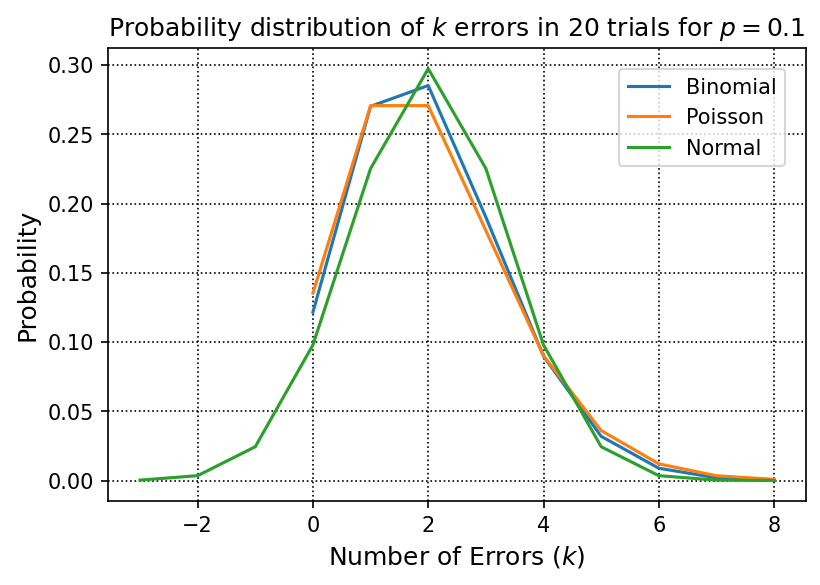

In [46]:
"""Comparison of distributions among 
"""
compare_dist(Params(k=2, n=20))

In [23]:
%%timeit -r 1 -n 1
"""Test of print_interval() while measuring it time.
NOTE: For large n_start and n_end, it takes too much time complete it.
"""
test_of_intervals(
        n_start=1,
        n_end=100,
        n_step=1,
        confi_perc=99.0,  # Confidence Percentage (90 <= confi_perc < 100)
    )

Checking from n = 1 with 1 step(s)
Have checked n < 100
Have checked up to n = 100
=== Test OK ===
19.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [22]:
"""Tests of this program other than test_of_intervals.
Run and check if
'== OK : All the tests are succeeded. =='
is displayed at last.
"""
test_all()

=== Test for Z_{alpha} and Z_{alpha/2} ===

== zah_to_alpha() and alpha_to_zah() ==
Check if zah_to_alpha(1.95996) = 0.05 = 0.05
Check if alpha_to_zah(0.05) = 1.95996 = 1.95996
Check if zah_to_alpha(2.57583) = 0.01 = 0.01
Check if alpha_to_zah(0.01) = 2.57583 = 2.57583

== za_to_alpha() and alpha_to_za() ==
Check if za_to_alpha(1.64485) = 0.05 = 0.05
Check if alpha_to_za(0.05) = 1.64485 = 1.64485
Check if za_to_alpha(2.32635) = 0.01 = 0.01
Check if alpha_to_za(0.01) = 2.32635 = 2.32635

== OK : Test for Z_{alpha} and Z_{alpha/2} ==

==== Test of no duplicate warning ====
Test is success, if one WARNING in each section is displayed.

=== params.set_confi_perc() -> params.set_alpha() ===
Is 'confi_perc=70' correct?

=== params.set_alpha() ===
Is 'alpha=0.4' correct?

=== Input check of alpha ===

== params.alpha_to_confi_perc(alpha) -> params.confi_perc_to_alpha(alpha_to_confi_perc_wo_check(alpha)) ==

= Should be warned once. =
alpha=0.5, checked one=0.4.
Is 'alpha=0.5' correct?
params.

In [ ]:
# Limitations

## Parameters where reliable results can be obtained

For $n > 10^7$, rounding erros become large and obtained interval might not be reliable, but for these parameters $p = k/n$ and width of the intervals are almost 0.

For the following combinations of alpha, n and its all the k's, we have checked that reliable intervals are obtained.

| n for alpha=0.01 | Elapsed time to test |
|--:|--:|
| 1-1000     | 31min 52s    |
| 1001-2000  | 1h 22min 50s |
| 2001-3000  | 2h 32min 52s |
| 3001-9999  | 2d 4h 2min   |
| 10000      | 39.5 s       |
| 100000     | 6min 16s     |
| 1000000    | 1h 23min 32s |
| 10000000   | 11h 4min 24s |

| n for alpha=0.05 | Elapsed time to test |
|--:|--:|
| 1-1000     | 30min 10s    |
| 1001-3000  | 3h 54min 15s |
| 3001-4000  | 3h 18min 22s |
| 4001-9999  | 1d 15h 39min |
| 10000      | 33.5 s       |
| 100000     | 5min 33s     |
| 1000000    | 1h 16min 9s  |
| 10000000   | 10h 35min    |

## Parameters where reliable results might not be obtained

The following parameters are examples where we have confirmed that rounding erros become large for some k.

### For alpha = 0.05


### For alpha = 0.01

- n = 20000000
- n = 30000000

~~~text
Lower : check if abs(0.0050000000000000044 - 9.230364466308494e-23) <= 1e-05
Wrong interval at n=30000000 k=3129586
Lower : check if abs(0.0050000000000000044 - 9.230863294158834e-23) <= 1e-05
Wrong interval at n=30000000 k=3129588
Lower : check if abs(0.0050000000000000044 - 9.166170335707101e-23) <= 1e-05
Wrong interval at n=30000000 k=3129609
Lower : check if abs(0.0050000000000000044 - 9.206277290326134e-23) <= 1e-05
Wrong interval at n=30000000 k=3129643
Lower : check if abs(0.0050000000000000044 - 9.19791981950339e-23) <= 1e-05
Wrong interval at n=30000000 k=3129646
Lower : check if abs(0.0050000000000000044 - 9.267084947589555e-23) <= 1e-05
Wrong interval at n=30000000 k=3129670
Lower : check if abs(0.0050000000000000044 - 9.248821614226652e-23) <= 1e-05
Wrong interval at n=30000000 k=3129676
Lower : check if abs(0.005000000000000
...
Wrong interval at n=30000000 k=3328198
Lower : check if abs(0.0050000000000000044 - 9.5731133473058e-177) <= 1e-05
Wrong interval at n=30000000 k=3328199
Lower : check if abs(0.0050000000000000044 - 1.6056248530096884e-177) <= 1e-05
Wrong interval at n=30000000 k=3328200
Lower : check if abs(0.0050000000000000044 - 0.0) <= 1e-05
Wrong interval at n=30000000 k=3417808
Lower : check if abs(0.0050000000000000044 - 0.0) <= 1e-05
Wrong interval at n=30000000 k=3417809
...
Lower : check if abs(0.0050000000000000044 - 0.0) <= 1e-05
Wrong interval at n=30000000 k=3420544
Lower : check if abs(0.0050000000000000044 - 0.0) <= 1e-05
Wrong interval at n=30000000 k=3420545
Lower : check if abs(0.0050000000000000044 - 0.0) <= 1e-05
Wrong interval at n=30000000 k=3420546
Lower : check if abs(0.0050000000000000044 - 7.036953717119728e-66) <= 1e-05
Wrong interval at n=30000000 k=3523983
Lower : check if abs(0.0050000000000000044 - 5.215375280648716e-66) <= 1e-05
Wrong interval at n=30000000 k=3523984
Lower : check if abs(0.0050000000000000044 - 6.106266929677799e-66) <= 1e-05
Wrong interval at n=30000000 k=3523985
~~~

- n = 50000000

~~~text
Have checked k < 2680000
Have checked k < 2690000
Lower : check if abs(0.0050000000000000044 - 9.210820629271258e-23) <= 1e-05
Wrong interval at n=50000000 k=2697642
Lower : check if abs(0.0050000000000000044 - 9.174924629368513e-23) <= 1e-05
Wrong interval at n=50000000 k=2697651
...
Lower : check if abs(0.0050000000000000044 - 7.258710701189427e-88) <= 1e-05
Wrong interval at n=50000000 k=2805631
Lower : check if abs(0.0050000000000000044 - 1.246382200804893e-87) <= 1e-05
Wrong interval at n=50000000 k=2805632
Lower : check if abs(0.0050000000000000044 - 0.0) <= 1e-05
Wrong interval at n=50000000 k=2860669
Lower : check if abs(0.0050000000000000044 - 0.0) <= 1e-05
Wrong interval at n=50000000 k=2860670
...
Lower : check if abs(0.0050000000000000044 - 0.0) <= 1e-05
Wrong interval at n=50000000 k=2929827
Lower : check if abs(0.0050000000000000044 - 0.0) <= 1e-05
Wrong interval at n=50000000 k=2929828
Lower : check if abs(0.0050000000000000044 - 9.553129120707296e-92) <= 1e-05
Wrong interval at n=50000000 k=2960844
Lower : check if abs(0.0050000000000000044 - 4.146220756114064e-92) <= 1e-05
~~~

- n = 67106434

~~~text
Have checked k < 2560000
Have checked k < 2570000
Lower : check if abs(0.0050000000000000044 - 9.172444890047362e-23) <= 1e-05
Wrong interval at n=67106434 k=2575662
Lower : check if abs(0.0050000000000000044 - 9.09989847562072e-23) <= 1e-05
Wrong interval at n=67106434 k=2575678
Lower : check if abs(0.0050000000000000044 - 9.207074472743953e-23) <= 1e-05
Wrong interval at n=67106434 k=2575759
Lower : check if abs(0.0050000000000000044 - 9.205284380332059e-23) <= 1e-05
Wrong interval at n=67106434 k=2575760
...
Lower : check if abs(0.0050000000000000044 - 1.6612939795126142e-25) <= 1e-05
Wrong interval at n=67106434 k=2856092
Lower : check if abs(0.0050000000000000044 - 1.4792690606970642e-25) <= 1e-05
Wrong interval at n=67106434 k=2856093
~~~

- n = 67106435

~~~text
Checking from n = 67106435 with 1 step(s)
Lower : check if abs(0.0050000000000000044 - 0.5768099272682233) <= 1e-05
Wrong interval at n=67106435 k=3
Upper : check if abs(0.0050000000000000044 - 0.5768099272682233) <= 1e-05
Wrong interval at n=67106435 k=67106432
Have checked up to n = 67106435
~~~